## To predict the selling price of a car

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from pandas.plotting import scatter_matrix
import math
import nltk


# getting the dataset

In [2]:
car_data = pd.read_csv('car data.csv')
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
car_data = pd.DataFrame(car_data)

In [4]:
car_data['Fuel_Type'].unique()


array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [5]:
count = car_data['Car_Name'].value_counts()
threshold = 7.5
repl = count[count <= threshold].index
print(car_data['Car_Name'].unique())

['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Splend

In [6]:
car_cat = pd.get_dummies(car_data['Car_Name'].replace(repl,"Uncommmon"))


In [7]:
car_data['Transmission'].unique()


array(['Manual', 'Automatic'], dtype=object)

In [8]:
car_data['Owner'].unique()


array([0, 1, 3], dtype=int64)

In [9]:
car_data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [10]:

for i in range(301):
    car_data.loc[i,['Year']] = 2023 - car_data.loc[i,['Year']]
    
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,9,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,10,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,6,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,12,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,9,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,7,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,8,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,14,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,6,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [11]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
type(car_data)


pandas.core.frame.DataFrame

In [13]:
car_data['Depreciation'] = (car_data['Present_Price'] - car_data['Selling_Price'])/car_data['Year']
# car_data['Depreciation_per_km'] = (car_data['Present_Price'] - car_data['Selling_Price'])/car_data['Kms_Driven']
car_data


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation
0,ritz,9,3.35,5.59,27000,Petrol,Dealer,Manual,0,0.248889
1,sx4,10,4.75,9.54,43000,Diesel,Dealer,Manual,0,0.479000
2,ciaz,6,7.25,9.85,6900,Petrol,Dealer,Manual,0,0.433333
3,wagon r,12,2.85,4.15,5200,Petrol,Dealer,Manual,0,0.108333
4,swift,9,4.60,6.87,42450,Diesel,Dealer,Manual,0,0.252222
...,...,...,...,...,...,...,...,...,...,...
296,city,7,9.50,11.60,33988,Diesel,Dealer,Manual,0,0.300000
297,brio,8,4.00,5.90,60000,Petrol,Dealer,Manual,0,0.237500
298,city,14,3.35,11.00,87934,Petrol,Dealer,Manual,0,0.546429
299,city,6,11.50,12.50,9000,Diesel,Dealer,Manual,0,0.166667


In [14]:
car_data = pd.concat([car_data,car_cat], axis = 1)
car_data = pd.get_dummies(car_data, columns = ['Transmission',"Fuel_Type","Seller_Type"], drop_first=True)
car_data.drop(columns="Car_Name", inplace=True)

In [15]:
type(car_data)

pandas.core.frame.DataFrame

In [16]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
print(car_data)

     Year  Selling_Price  Present_Price  Kms_Driven  Owner  Depreciation  \
0       9           3.35           5.59       27000      0      0.248889   
1      10           4.75           9.54       43000      0      0.479000   
2       6           7.25           9.85        6900      0      0.433333   
3      12           2.85           4.15        5200      0      0.108333   
4       9           4.60           6.87       42450      0      0.252222   
..    ...            ...            ...         ...    ...           ...   
296     7           9.50          11.60       33988      0      0.300000   
297     8           4.00           5.90       60000      0      0.237500   
298    14           3.35          11.00       87934      0      0.546429   
299     6          11.50          12.50        9000      0      0.166667   
300     7           5.30           5.90        5464      0      0.085714   

     Uncommmon  brio  ciaz  city  corolla altis  fortuner  grand i10  i20  \
0         

In [17]:
correlation_matrix = car_data.corr()
correlation_matrix['Selling_Price']

Year                     -0.236141
Selling_Price             1.000000
Present_Price             0.878983
Kms_Driven                0.029187
Owner                    -0.088344
Depreciation              0.656466
Uncommmon                -0.526853
brio                      0.003058
ciaz                      0.097252
city                      0.167118
corolla altis             0.117753
fortuner                  0.538261
grand i10                 0.009198
i20                       0.003646
innova                    0.280812
verna                     0.062962
Transmission_Manual      -0.367128
Fuel_Type_Diesel          0.552339
Fuel_Type_Petrol         -0.540571
Seller_Type_Individual   -0.550724
Name: Selling_Price, dtype: float64

In [18]:
# OneHotEncoder = OneHotEncoder()

In [19]:
# transformer = ColumnTransformer(transformers=[('tnf1', OneHotEncoder(sparse=False, drop='first'),['Transmission','Seller_Type','Fuel_Type','Car_Name'])],
#                           remainder='passthrough')
# car_data = transformer.fit_transform(car_data).shape

array([[<AxesSubplot:xlabel='Selling_Price', ylabel='Selling_Price'>,
        <AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>,
        <AxesSubplot:xlabel='Depreciation', ylabel='Selling_Price'>],
       [<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>,
        <AxesSubplot:xlabel='Present_Price', ylabel='Present_Price'>,
        <AxesSubplot:xlabel='Depreciation', ylabel='Present_Price'>],
       [<AxesSubplot:xlabel='Selling_Price', ylabel='Depreciation'>,
        <AxesSubplot:xlabel='Present_Price', ylabel='Depreciation'>,
        <AxesSubplot:xlabel='Depreciation', ylabel='Depreciation'>]],
      dtype=object)

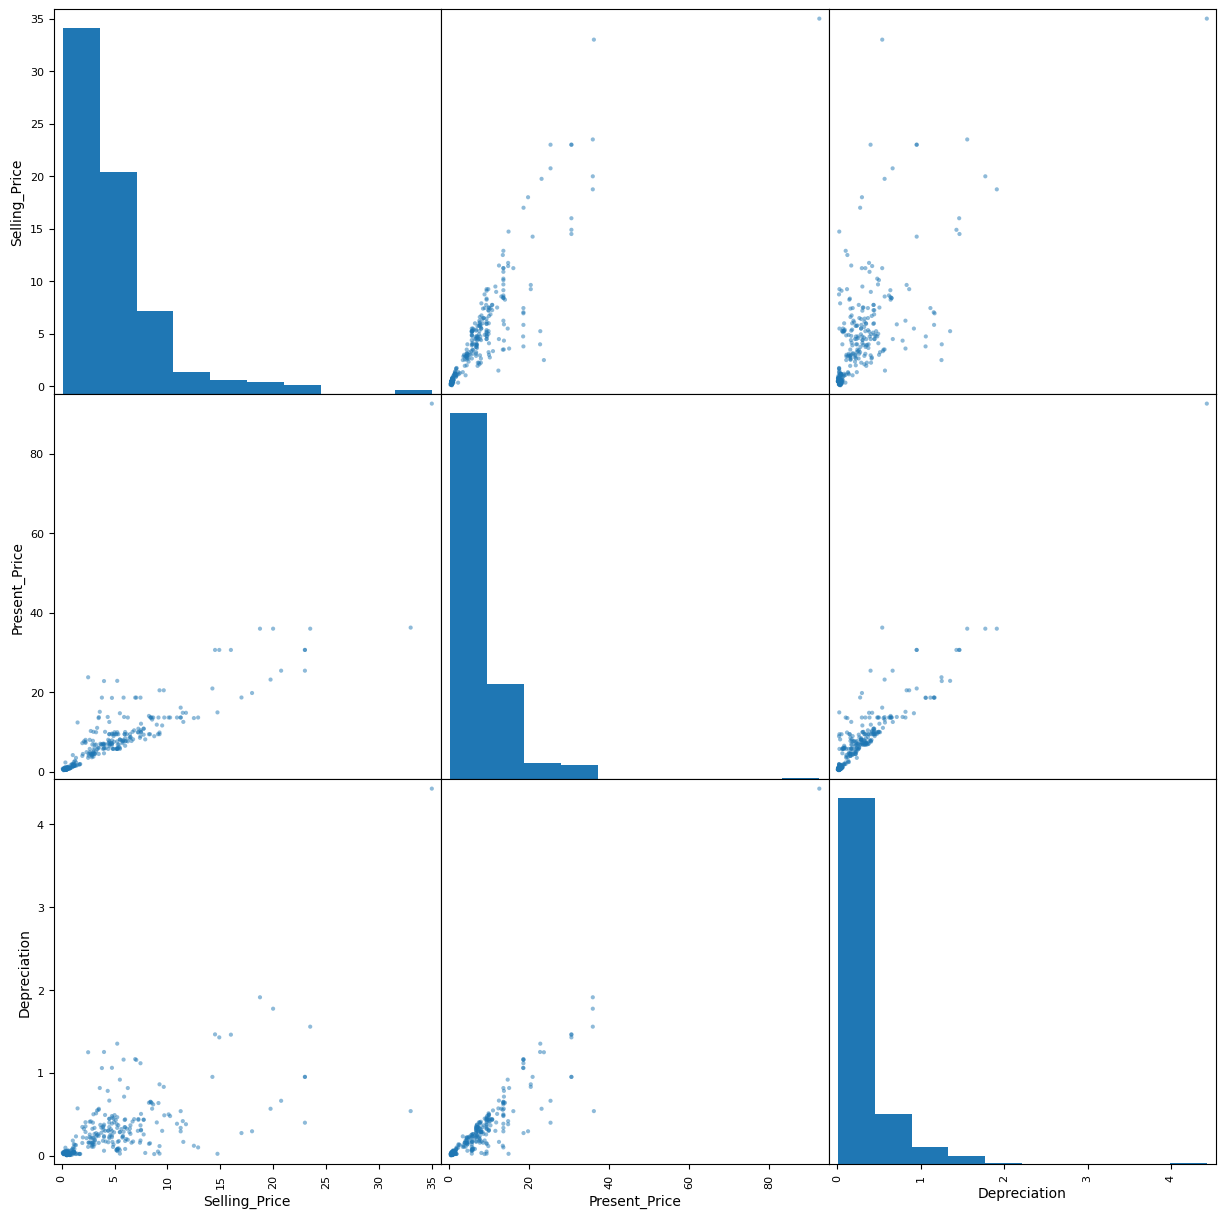

In [20]:
attributes = ['Selling_Price','Present_Price','Depreciation']
scatter_matrix(car_data[attributes],figsize=(15,15))

<AxesSubplot:xlabel='Depreciation', ylabel='Present_Price'>

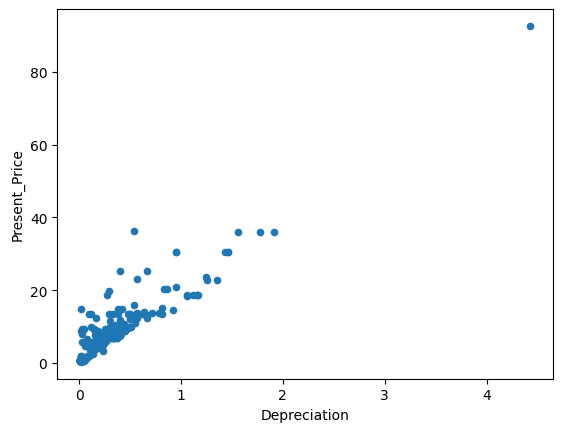

In [21]:
car_data.plot(kind='scatter',x='Depreciation',y = 'Present_Price')

In [22]:
car_data

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Depreciation,Uncommmon,brio,ciaz,city,corolla altis,fortuner,grand i10,i20,innova,verna,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual
0,9,3.35,5.59,27000,0,0.248889,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1,10,4.75,9.54,43000,0,0.479000,1,0,0,0,0,0,0,0,0,0,1,1,0,0
2,6,7.25,9.85,6900,0,0.433333,0,0,1,0,0,0,0,0,0,0,1,0,1,0
3,12,2.85,4.15,5200,0,0.108333,1,0,0,0,0,0,0,0,0,0,1,0,1,0
4,9,4.60,6.87,42450,0,0.252222,1,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,7,9.50,11.60,33988,0,0.300000,0,0,0,1,0,0,0,0,0,0,1,1,0,0
297,8,4.00,5.90,60000,0,0.237500,0,1,0,0,0,0,0,0,0,0,1,0,1,0
298,14,3.35,11.00,87934,0,0.546429,0,0,0,1,0,0,0,0,0,0,1,0,1,0
299,6,11.50,12.50,9000,0,0.166667,0,0,0,1,0,0,0,0,0,0,1,1,0,0


In [23]:
x = car_data.drop(columns=['Selling_Price'])
x

,Year,Present_Price,Kms_Driven,Owner,Depreciation,Uncommmon,brio,ciaz,city,corolla altis,fortuner,grand i10,i20,innova,verna,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual
0,9,5.59,27000,0,0.248889,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1,10,9.54,43000,0,0.479000,1,0,0,0,0,0,0,0,0,0,1,1,0,0
2,6,9.85,6900,0,0.433333,0,0,1,0,0,0,0,0,0,0,1,0,1,0
3,12,4.15,5200,0,0.108333,1,0,0,0,0,0,0,0,0,0,1,0,1,0
4,9,6.87,42450,0,0.252222,1,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,7,11.60,33988,0,0.300000,0,0,0,1,0,0,0,0,0,0,1,1,0,0
297,8,5.90,60000,0,0.237500,0,1,0,0,0,0,0,0,0,0,1,0,1,0
298,14,11.00,87934,0,0.546429,0,0,0,1,0,0,0,0,0,0,1,0,1,0
299,6,12.50,9000,0,0.166667,0,0,0,1,0,0,0,0,0,0,1,1,0,0


In [24]:
y = car_data.loc[:,['Selling_Price']]
y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [25]:
# car_name = car_data['Car_Name']
# car_name.shape

In [26]:
# vectorizer = TfidfVectorizer()
# vectorizer.fit(x['Car_Name'])
# car_name = vectorizer.transform(x['Car_Name'].values)
# print(car_name)

In [27]:
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=42)
x_train.reset_index(drop = True, inplace = True)
x_test.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [28]:
model = LinearRegression()
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)

In [29]:
mse_train = mean_squared_error(y_train, model.predict(x_train))
mse_train

0.6585354385292549

In [30]:
mse = mean_squared_error(y_test,y_predicted)
mse

0.9485598085321431

In [31]:
rmse = math.sqrt(mse)
rmse

0.9739403516294738

In [32]:
mae = mean_absolute_error(y_test, y_predicted)
mae

0.6637647509784605

In [33]:
mae_train = mean_absolute_error(y_train, model.predict(x_train))
mae_train

0.5587951609975123

In [34]:
score = model.score(x_test,y_test)
score

0.9666870433858504

In [35]:
# calculating score manually
u = ((y_test - y_predicted)**2).sum()
v = ((y-y_test.mean())**2).sum()

score = 1-(u/v)
print(score)

Selling_Price    0.988881
dtype: float64


In [36]:
score_train = model.score(x_train,y_train)
score_train

0.9731676974852368